In [61]:
%load_ext autoreload
%autoreload 2

from loguru import logger
import numpy as np
import pandas as pd
import polars as pl
from pathlib import Path
from tqdm import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:

from adn.data import DatasetMode, load_datasets

individuals_snp_dir = Path("data/output/SNPs/")
metadata_path = Path("data/DIVRICE_3k10M_ch1/DIVRICE_3k10M_metadata.tsv")
sequence_length = 128
train_eval_split = 0
labels_to_remove = "cA"
individuals_to_ignore = Path("data/bad_guys.txt")

ds, _ = load_datasets(
    individuals_snp_dir=Path(individuals_snp_dir),
    metadata_path=Path(metadata_path),
    sequence_length=sequence_length,
    train_eval_split=train_eval_split,
    data_ratio_to_use=1,
    mode=DatasetMode.SEQUENTIAL_FIXED_LEN,
    labels_to_remove=labels_to_remove,
    individual_to_ignore=individuals_to_ignore,
    overlaping_ratio=0.5,
)

2025-03-30 22:53:04.744 | INFO     | adn.data:load_metadata:43 - Using labels: {'XI', 'GJ'}. Excluding: {'cA'}
2025-03-30 22:53:04.754 | INFO     | adn.data:load_metadata:52 - Ignoring individuals: {'CX12,', 'IRIS_313-11286', 'CX367', 'IRIS_313-9817', 'IRIS_313-10771', 'IRIS_313-11656', 'B155', 'CX49,', 'B051', 'IRIS_313-9400', 'IRIS_313-7725', 'IRIS_313-10268', 'IRIS_313-10054', 'IRIS_313-9348', 'B037', 'IRIS_313-9841', 'B047', 'CX284', 'IRIS_313-10318', 'IRIS_313-10300', 'IRIS_313-10998', 'CX243', 'IRIS_313-11807', 'B176', 'IRIS_313-11153', 'IRIS_313-9066,', 'IRIS_313-11808', 'IRIS_313-9600', 'CX282', 'IRIS_313-10158', 'IRIS_313-11380', 'CX11,'}


Output()

/home/pierre/dev/DNA/adn/data.py:29: TqdmExperimentalWarning: rich is experimental/alpha
  iterrable = tqdm(snp_parquet_files, desc="Loading SNP data...")


2025-03-30 22:53:07.113 | INFO     | adn.data:load_datasets:103 - Train test split set to 0, using all data for training
2025-03-30 22:53:07.116 | INFO     | adn.data:load_datasets:142 - Train dataset loaded with 2617 individuals


In [63]:
from adn.prediction_results import OnDiskPredictionResults


res = OnDiskPredictionResults(Path("output/v8-activation-shaping/predictions/"), workers=8)
errors_df = res.compute_error()

Computing errors: 100%|██████████| 2644/2644 [00:10<00:00, 254.88file/s]


<Axes: ylabel='Frequency'>

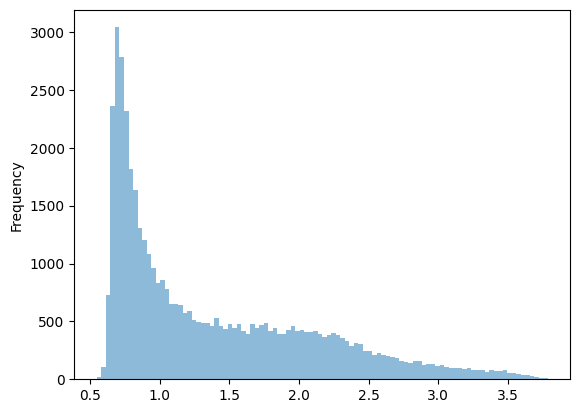

In [76]:
(-errors_df["ennergy_scores"]).plot.hist(bins=100, alpha=0.5)

In [74]:
errors_df[errors_df["ennergy_scores"] > -1]

,individual,logits,ennergy_scores,label,label_decoded,start_position,end_position,interval_length,GroupK9,pred,pred_prob,is_error,error,euclidean_distance_GJ,euclidean_distance_XI
0,IRIS_313-8660,"[0.53657293, 0.46342713]",-0.759179,1,XI,22017474,22353096,335622,XI-2,0,0.536573,1,0.463427,10.185734,12.027742
2,IRIS_313-8660,"[0.59870714, 0.4012928]",-0.713962,1,XI,28213188,28408952,195764,XI-2,0,0.598707,1,0.401293,10.467416,12.293481
3,IRIS_313-8660,"[0.5162592, 0.48374078]",-0.691978,1,XI,43105820,43158824,53004,XI-2,0,0.516259,1,0.483741,9.635493,11.443744
4,IRIS_313-8660,"[0.5398508, 0.4601493]",-0.726917,1,XI,43144988,43177396,32408,XI-2,0,0.539851,1,0.460149,9.212883,11.671792
5,IRIS_313-8660,"[0.6831074, 0.31689265]",-0.803347,1,XI,43159928,43215852,55924,XI-2,0,0.683107,1,0.316893,8.349270,12.445847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45589,IRIS_313-11280,"[0.67865777, 0.32134217]",-0.836228,1,XI,9459126,9595906,136780,XI-adm,0,0.678658,1,0.321342,7.922042,12.589191
45601,IRIS_313-11280,"[0.7610312, 0.23896883]",-0.866487,1,XI,10209106,10318232,109126,XI-adm,0,0.761031,1,0.238969,8.400613,12.619300
45602,IRIS_313-11280,"[0.8207538, 0.17924619]",-0.978704,1,XI,10265909,10350436,84527,XI-adm,0,0.820754,1,0.179246,6.899322,13.378417
45604,CX380,"[0.25077438, 0.7492256]",-0.804036,0,GJ,221359,337330,115971,GJ-tmp,1,0.749226,1,0.250774,12.417753,9.307753


In [ ]:
import torch




data = torch.randn(256,2)
ennergy_score(data).shape

torch.Size([256])

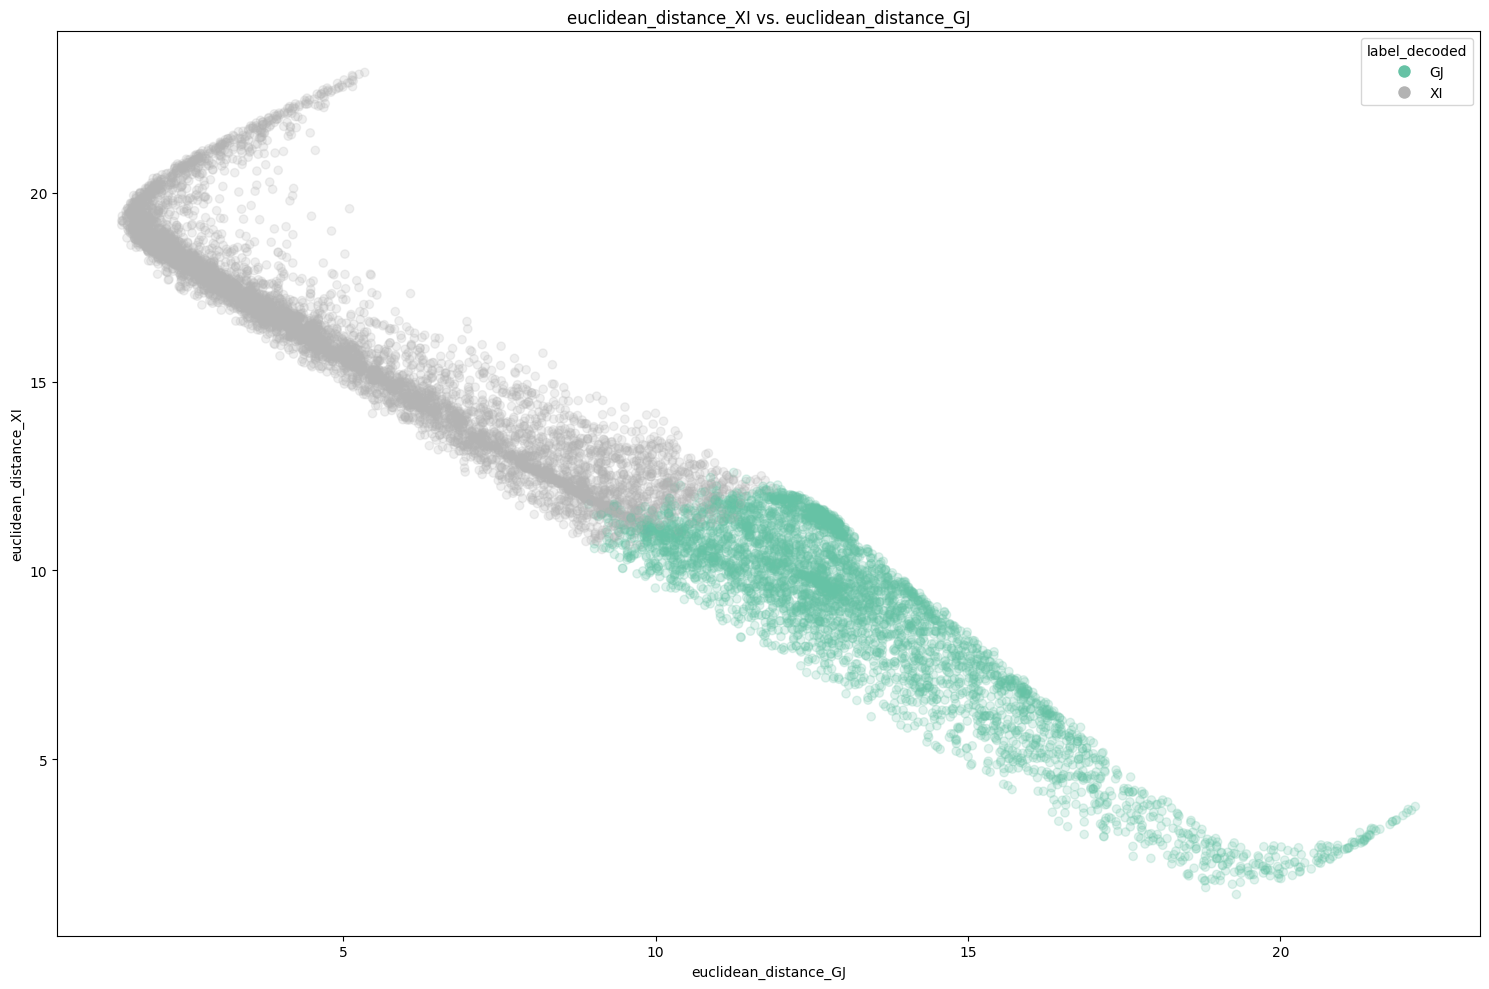

In [90]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import Colormap

def plot_euclidean_scatter(
    df: pd.DataFrame,
    sample_size: int = 10000,
    alpha: float = 0.2,
    cmap: Colormap = plt.cm.Set2
) -> None:
    sample = df.sample(min(sample_size, len(df)))

    label_col = "label_decoded"
    x_col = "euclidean_distance_GJ"
    y_col = "euclidean_distance_XI"
    
    label_categorical = pd.Categorical(sample[label_col])
    categories = label_categorical.categories
    codes = label_categorical.codes

    num_categories = len(categories)

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.scatter(
        sample[x_col],
        sample[y_col],
        alpha=alpha,
        c=codes,
        cmap=cmap,
    )

    ax.set_title(f"{y_col} vs. {x_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    handles = [
        plt.Line2D(
            [], [], 
            marker="o", 
            color="w", 
            markerfacecolor=cmap(i / (num_categories - 1)),
            markersize=10, 
            label=cat
        )
        for i, cat in enumerate(categories)
    ]

    ax.legend(
        loc="best",
        handles=handles,
        title=label_col,
    )

    plt.tight_layout()
    plt.show()

plot_euclidean_scatter(
    errors_df,
    sample_size=10000,
)

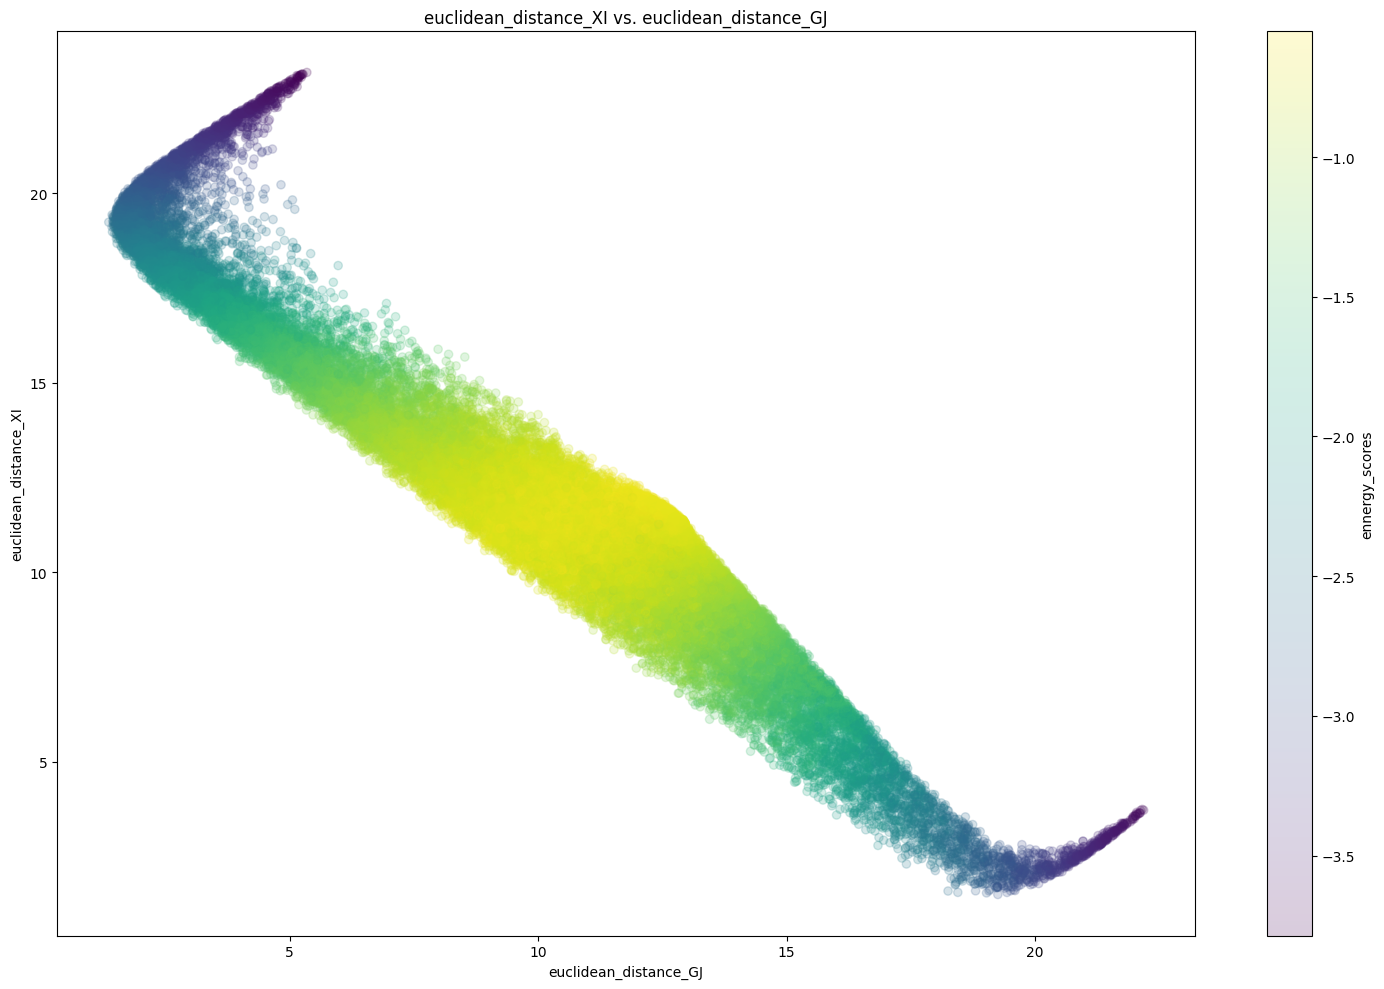

In [95]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import Colormap

def plot_euclidean_scatter(
    df: pd.DataFrame,
    sample_size: int = 10000,
    alpha: float = 0.2,
    cmap: Colormap = plt.cm.viridis,
) -> None:
    sample = df.sample(min(sample_size, len(df)))

    color_by = "ennergy_scores"
    x_col = "euclidean_distance_GJ"
    y_col = "euclidean_distance_XI"
    
    fig, ax = plt.subplots(figsize=(15, 10))

    scatter = ax.scatter(
        sample[x_col],
        sample[y_col],
        alpha=alpha,
        c=sample[color_by] if color_by else "blue",
        cmap=cmap if color_by else None,
    )

    ax.set_title(f"{y_col} vs. {x_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    # Ajouter une colorbar uniquement si c'est une variable continue
    if color_by:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label(color_by)

    plt.tight_layout()
    plt.show()

plot_euclidean_scatter(
    errors_df[-errors_df["ennergy_scores"] < 4],
    sample_size=45000,
    alpha=0.2,
    cmap=plt.cm.viridis,
)

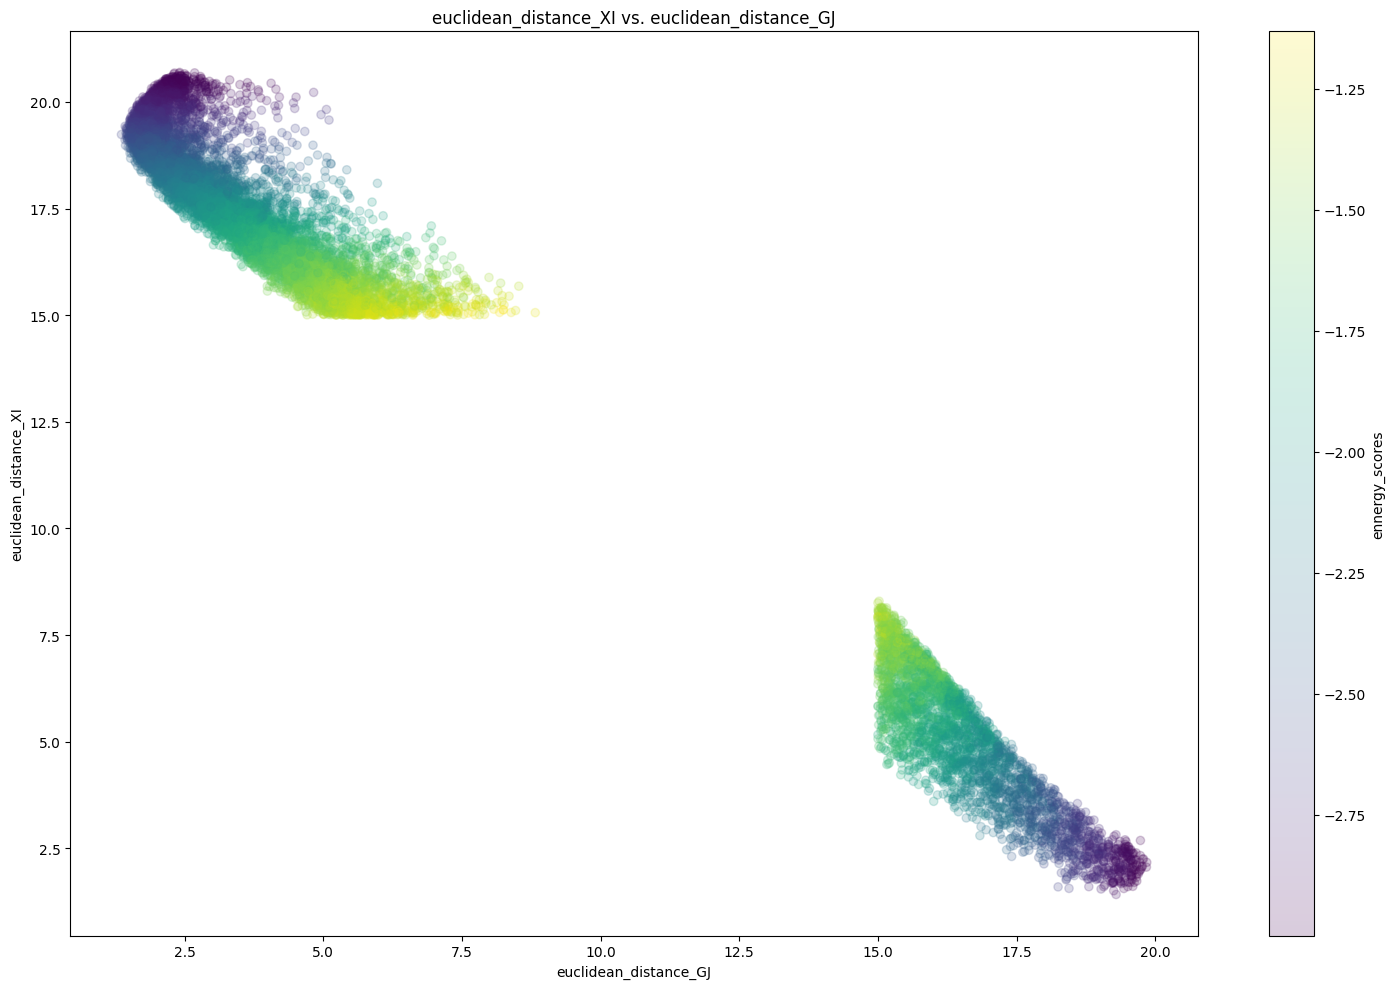

In [103]:

def filter_errors(errors_df: pd.DataFrame, label_centroid_min_dist: float, other_centroid_max_dist: float) -> pd.DataFrame:
    
    def should_keep_row(row: pd.Series) -> bool:
        label = row["label_decoded"]
        label_centroid_distance_col_name = f"euclidean_distance_{label}"
        label_centroid_distance = row[label_centroid_distance_col_name]
        other_centroid_distance_cols = list(filter(lambda x: x.startswith("euclidean_distance_") and x != label_centroid_distance_col_name, row.index))
        return label_centroid_distance > label_centroid_min_dist and any(row[other_centroid_distance_cols] < other_centroid_max_dist)
    
    filtered_df = errors_df[errors_df.apply(should_keep_row, axis=1)]
    return filtered_df

filtered_errors_df = filter_errors(errors_df, label_centroid_min_dist=15, other_centroid_max_dist=10)
filtered_errors_df = filtered_errors_df[-filtered_errors_df["ennergy_scores"] < 3]
plot_euclidean_scatter(
    filtered_errors_df,
    sample_size=45000,
    alpha=0.2,
    cmap=plt.cm.viridis,
)

In [104]:
unique_labels = filtered_errors_df["label_decoded"].unique()
label_to_array = {label: np.zeros(ds.max_position) for label in unique_labels}

def min_max_scaler(s: pd.Series) -> pd.Series:
    min_val = s.min()
    max_val = s.max()
    if min_val == max_val:
        return s
    return (s - min_val) / (max_val - min_val)

for col in filtered_errors_df.columns:
    if col.startswith("euclidean_distance_"):
        filtered_errors_df[f"{col}_scaled"] = min_max_scaler(filtered_errors_df[col])
        

for i, row in tqdm(filtered_errors_df.iterrows(), total=len(filtered_errors_df)):
    label = row["label_decoded"]
    start_position = row["start_position"]
    end_position = row["end_position"]
    
    if label == "XI":
        scaled_distance = row["euclidean_distance_GJ_scaled"]
    else:
        scaled_distance = row[f"euclidean_distance_XI_scaled"]
    
    inv_scaled_distance = 1 - scaled_distance
    
    label_to_array[label][start_position:end_position] += inv_scaled_distance
    
    

  0%|          | 0/17143 [00:00<?, ?it/s]

100%|██████████| 17143/17143 [00:01<00:00, 9181.27it/s] 


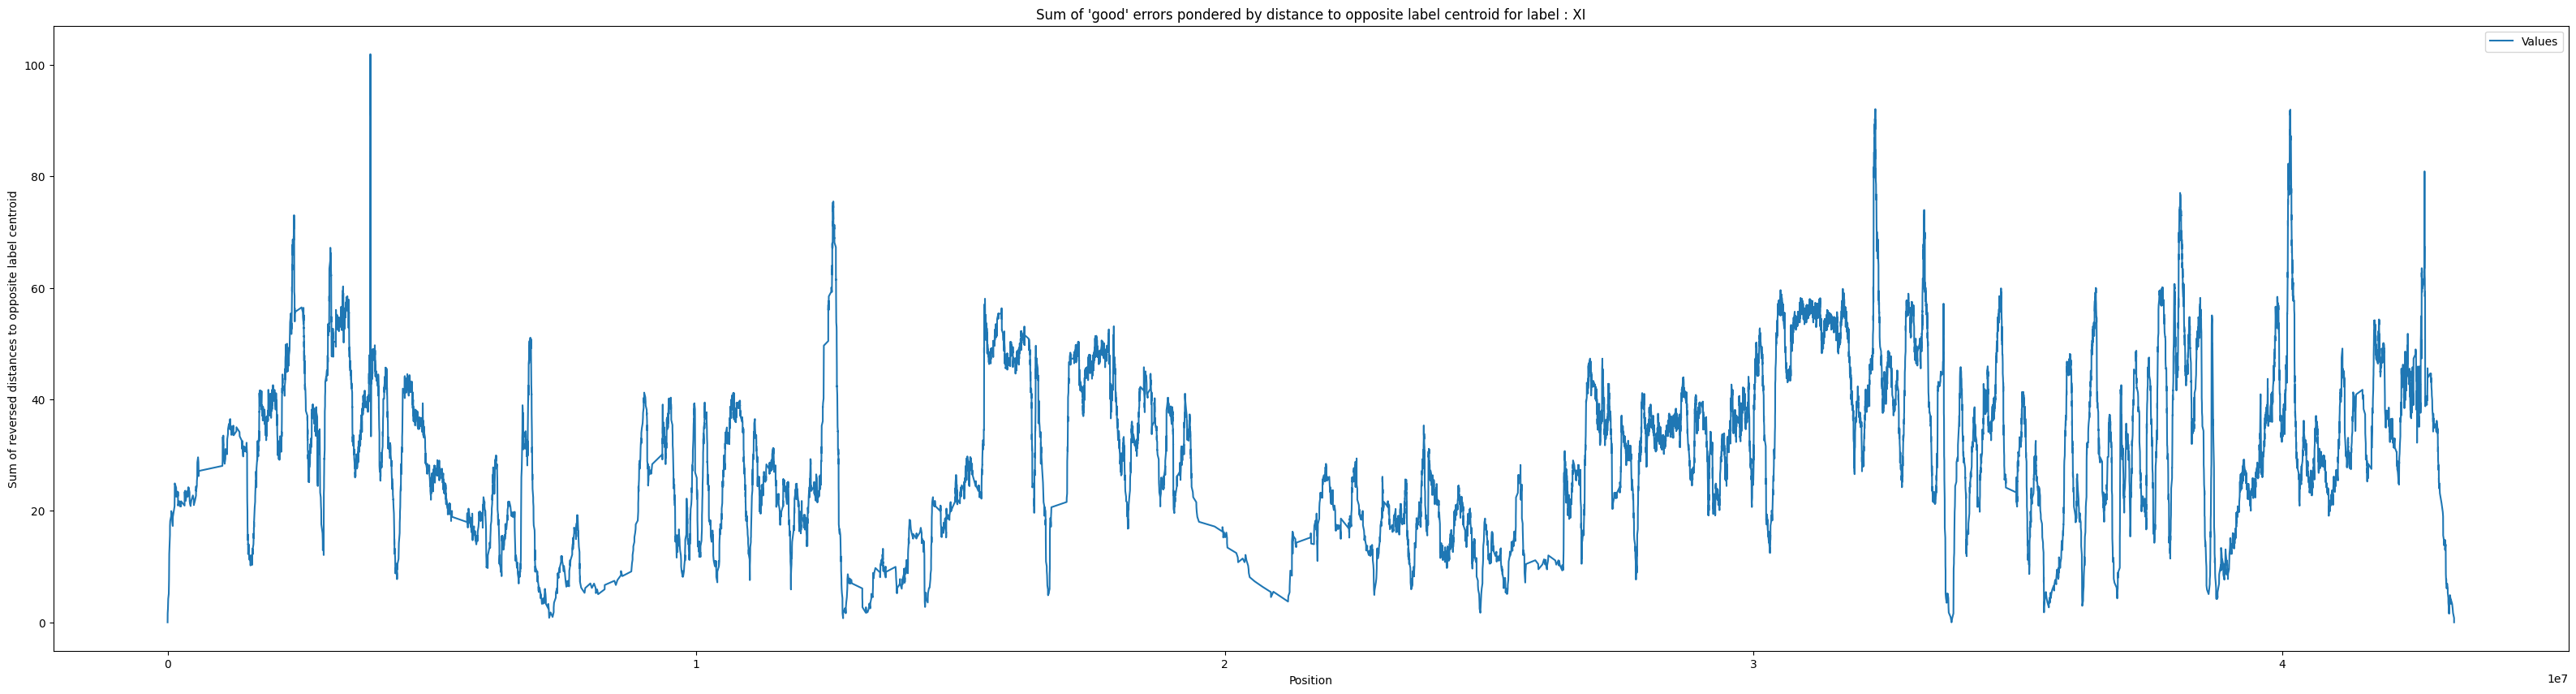

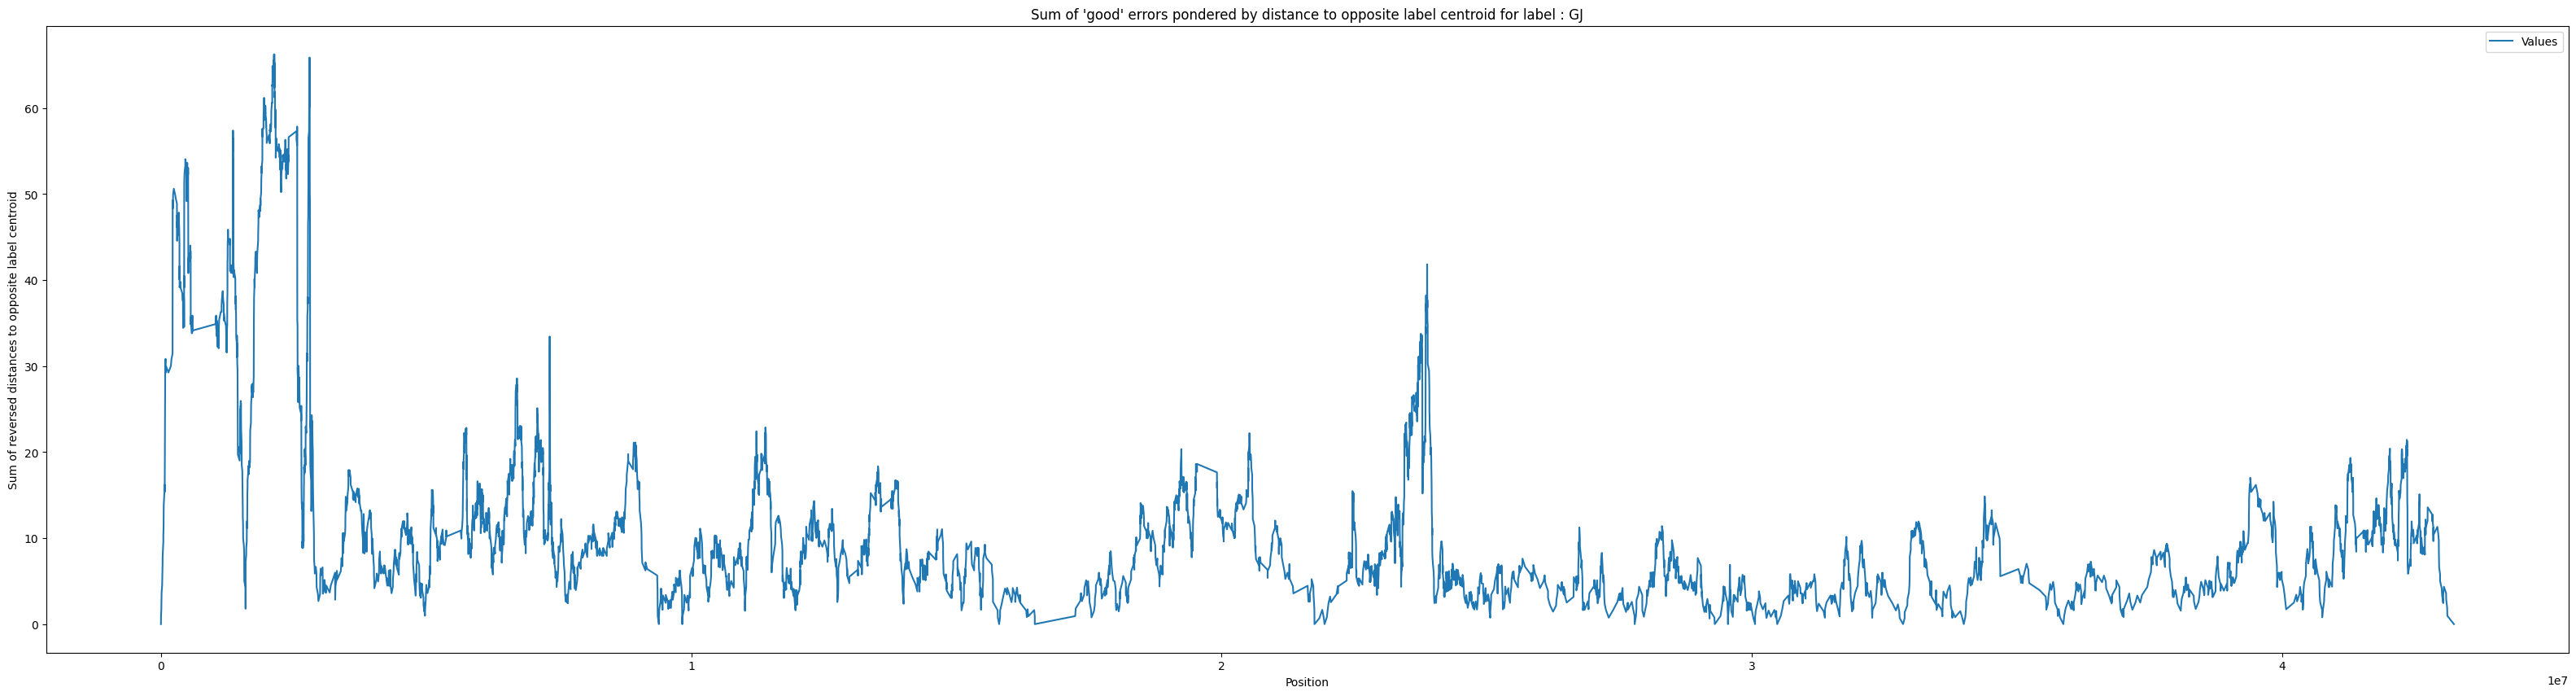

In [105]:


for label, array in label_to_array.items():
    values_df = pd.DataFrame({"values": array})
    values_df = values_df.mask(values_df == values_df.shift()).dropna()
    
    title = f"Sum of 'good' errors pondered by distance to opposite label centroid for label : {label}"
    
    ax = values_df.plot.line(y="values", title=title, figsize=(40, 10), legend=True)
    
    ax.legend(["Values"])
    ax.set_xlabel("Position")
    ax.set_ylabel("Sum of reversed distances to opposite label centroid")

In [ ]:
import math
import pandas as pd
from pathlib import Path
from adn.utils.paths_utils import PathHelper
from loguru import logger
from adn.cli.hapmap_to_snp import filter_on_heterozygous_rate, filter_on_missing_data

def filter_on_missing_data(
    chunk: pd.DataFrame,
    individuals: list[str],
    max_missing_data_percent: float,
) -> pd.DataFrame:
    before_len = len(chunk)
    missing_data_count = chunk[individuals].isna().sum(axis=1)
    # missing_data_count += (chunk[individuals] == "NN").sum(axis=1)
    threshold = math.ceil(
        (max_missing_data_percent / 100) * len(individuals)
    )  # Calculate the threshold
    chunk = chunk[missing_data_count <= threshold]

    logger.info(
        f"Filtered based on missing data: before {before_len}, after {len(chunk)}"
    )
    return chunk

base_path = Path("data/output/")
path_helper = PathHelper(base_path)

metadata_path = path_helper.metadata_file_path
metadata_df = pd.read_csv(metadata_path)
individuals = metadata_df["individual"]


for file in path_helper.list_raw_chunks_paths:
    chunk = pd.read_parquet(file)
    chunk = filter_on_missing_data(chunk=chunk, max_missing_data_percent=1 individuals=individuals)
    chunk = filter_on_heterozygous_rate(chunk=chunk, max_heterozygous_percent=5, individuals=individuals)
    

2025-04-20 17:31:23.708 | INFO     | __main__:filter_on_missing_data:21 - Filtered based on missing data: before 5000, after 5000
2025-04-20 17:31:25.439 | INFO     | adn.cli.hapmap_to_snp:filter_on_heterozygous_rate:74 - Filtered based on heterozygous rate: before 5000, after 4944
2025-04-20 17:31:28.947 | INFO     | __main__:filter_on_missing_data:21 - Filtered based on missing data: before 5000, after 5000
2025-04-20 17:31:30.808 | INFO     | adn.cli.hapmap_to_snp:filter_on_heterozygous_rate:74 - Filtered based on heterozygous rate: before 5000, after 4976


KeyboardInterrupt: 

In [27]:
import math

max_missing_data_percent = 0.5  # Set your threshold here

missing_data_count = chunk[individuals].isna().sum(axis=1)
missing_data_count += (chunk[individuals] == "NN").sum(axis=1)
threshold = math.ceil(
    (max_missing_data_percent/100) * len(individuals)
)  # Calculate the threshold
chunk = chunk[missing_data_count <= threshold]
print(f"Filtered chunk shape: {chunk.shape}")

Filtered chunk shape: (4126, 3036)


In [20]:
threshold

303

In [23]:
missing_data_count.describe()

count    5000.000000
mean        9.116800
std         7.309873
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        30.000000
dtype: float64